https://github.com/alura-cursos/pln-deep-learning/blob/aula-04/Ativa%C3%A7%C3%B5es.ipynb

In [2]:
# Funções de Ativação

# Função linear
# Função sigmoide - representa todos os valores nos intervalo 0 e 1
# Função tangente hiperbolica - semelhante a sigmoide varia 
# https://pytorch.org/docs/stable/nn.html


from sklearn.datasets import make_classification
import matplotlib.pyplot as plt
import numpy as np
import torch
from torch import nn




-2.8


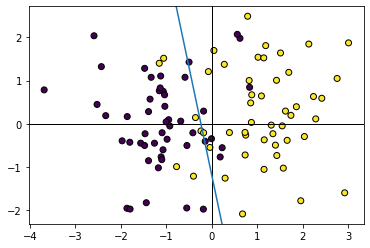

In [3]:
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt
import numpy as np
import torch
from torch import nn

np.random.seed(46)

X, Y = make_classification(n_features=2, n_redundant=0, n_informative=1,
                             n_clusters_per_class=1)

def plotmodel(w1, w2, b):
  
  plt.scatter(X[:, 0], X[:, 1], marker='o', c=Y,
           edgecolor='k')
  
  xmin, xmax = plt.gca().get_xlim()
  ymin, ymax = plt.gca().get_ylim()
  
  x = np.linspace(-2, 4, 50)
  y = (-w1*x -b)/w2

  plt.axvline(0, -1, 1, color='k', linewidth=1)
  plt.axhline(0, -2, 4, color='k', linewidth=1)
  plt.plot(x, y, label='_nolegend_')
  
  plt.xlim(xmin, xmax)
  plt.ylim(ymin, ymax)
  
w1 = 5 #a
w2 = 1  #b
b  = 1.2  #c
plotmodel(w1, w2, b)

p = (-1, 1)
print(w1 * p[0] + w2 * p[1] + b)

tensor([[-0.0183, -0.2345]])
tensor([-0.2446])


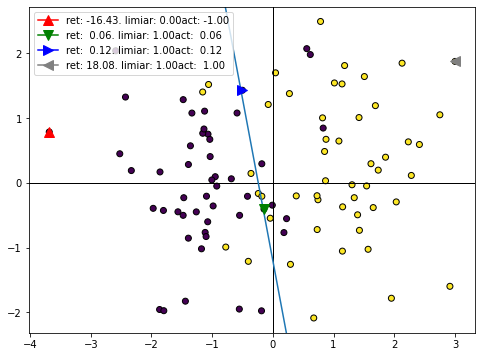

In [7]:
w1 = 5 #a
w2 = 1  #b
b  = 1.2  #c
#b  = -0.4  #c

perceptron = nn.Linear(2, 1)
activation = nn.Sigmoid()
#activation = nn.ReLU()
activation = nn.Tanh()

print(perceptron.weight.data)
print(perceptron.bias.data)

markers = ['^', 'v', '>', '<']
colors = ['r', 'g', 'b', 'gray']

perceptron.weight = nn.Parameter(torch.Tensor([[w1, w2]]))
perceptron.bias = nn.Parameter(torch.Tensor([b]))



plt.figure(figsize=(8, 6))
plotmodel(w1, w2, b)
for k, idx in enumerate([17, 21, 43, 66]):
  x = torch.Tensor(X[idx])
  ret = perceptron(x)
  act = activation(ret)

  act_limiar = 0 if ret < 0 else 1

  label = 'ret: {:5.2f}'.format(ret.data.numpy()[0]) + '. limiar: {:4.2f}'.format(act_limiar) + 'act: {:5.2f}'.format(act.data.numpy()[0])
  plt.plot(x[0], x[1], marker=markers[k], color=colors[k], markersize=10, label=label)
  

plt.legend()
plt.show()

